In [3]:
!pip install folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from math import sqrt

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/3 [xyzservices]
   ---------------------------------------- 0/3 [xyzservices]
   ---------------------------------------- 0/3 [xyzservices]
   ---------------------------------------- 0/3 [xyzservices]
   ---------------------------------------- 0/3 [xyzservices]
   ------------- -------------------------- 1/3 [branca]
   ------------- -------------------------- 1/3 [branca]
   ------------- -------------------------- 1/3 [branca]
   ------------- -------------------------- 1/3 [branca]
   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- -----------

In [7]:
import pandas as pd

# Load the dataset without parsing dates first
df = pd.read_csv(r"C:\Users\X1 CARBON TOUCH\Desktop\Introduction to Data Science with Jupyter Notebook\historical_automobile_sales.csv")

# Check the column names
print(df.columns)

Index(['Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City'], dtype='object')


In [8]:
import pandas as pd

# Read the CSV without trying to parse 'Date' and inspect
df = pd.read_csv(r"C:\Users\X1 CARBON TOUCH\Desktop\Introduction to Data Science with Jupyter Notebook\historical_automobile_sales.csv")

# Show the first few rows and column names to inspect
print(df.columns)
print(df.head())

Index(['Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City'], dtype='object')
  Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0  1/31/1980,1980,Jan,1,108.24,0.5,27483.571,1558...                                                                                                                             
1  2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048...                                                                                                                             
2  3/31/1980,1980,Mar,1,107.48,0.2,28238.443,3137...                                                                                                                             
3  4/30/1980,1980,Apr,1,115.01,1,32615.149,1653,7...                                 

In [12]:
print(df.columns)

Index(['Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City'], dtype='object')


In [13]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Display cleaned column names
print(df.columns)

Index(['date,year,month,recession,consumer_confidence,seasonality_weight,price,advertising_expenditure,competition,gdp,growth_rate,unemployment_rate,automobile_sales,vehicle_type,city'], dtype='object')


In [18]:
print("Actual columns in DataFrame:")
print(df.columns.tolist())

print("\nFirst few rows:")
print(df.head())

Actual columns in DataFrame:
['date,year,month,recession,consumer_confidence,seasonality_weight,price,advertising_expenditure,competition,gdp,growth_rate,unemployment_rate,automobile_sales,vehicle_type,city']

First few rows:
  date,year,month,recession,consumer_confidence,seasonality_weight,price,advertising_expenditure,competition,gdp,growth_rate,unemployment_rate,automobile_sales,vehicle_type,city
0  1/31/1980,1980,Jan,1,108.24,0.5,27483.571,1558...                                                                                                                             
1  2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048...                                                                                                                             
2  3/31/1980,1980,Mar,1,107.48,0.2,28238.443,3137...                                                                                                                             
3  4/30/1980,1980,Apr,1,115.01,1,32615.149,1653,7...          

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Recreate the DataFrame with proper column splitting
# First, let's get the data as a string
data = df.to_csv(index=False)

# Now read it properly with column splitting
df = pd.read_csv(StringIO(data))

# The column names are still combined, so let's fix that
df.columns = ['combined']

# Now split the combined column into separate columns
df = df['combined'].str.split(',', expand=True)

# Assign proper column names (from your index)
df.columns = [
    'date', 'year', 'month', 'recession', 'consumer_confidence', 
    'seasonality_weight', 'price', 'advertising_expenditure', 'competition',
    'gdp', 'growth_rate', 'unemployment_rate', 'automobile_sales', 
    'vehicle_type', 'city'
]

# Convert columns to proper data types
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(str)  # Or use pd.to_datetime if you want month numbers
df['recession'] = df['recession'].astype(int)
numeric_cols = [
    'consumer_confidence', 'seasonality_weight', 'price',
    'advertising_expenditure', 'competition', 'gdp', 'growth_rate',
    'unemployment_rate', 'automobile_sales'
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

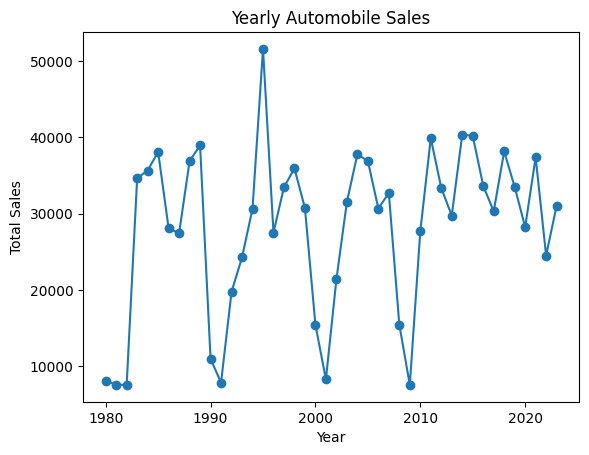

In [21]:
# Task 1.1: Line Chart - Total Automobile Sales per Year
sales_year = df.groupby("year")["automobile_sales"].sum()
sales_year.plot(kind="line", marker="o")
plt.title("Yearly Automobile Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.savefig("Line_plot_1.png")
plt.show()
plt.close()

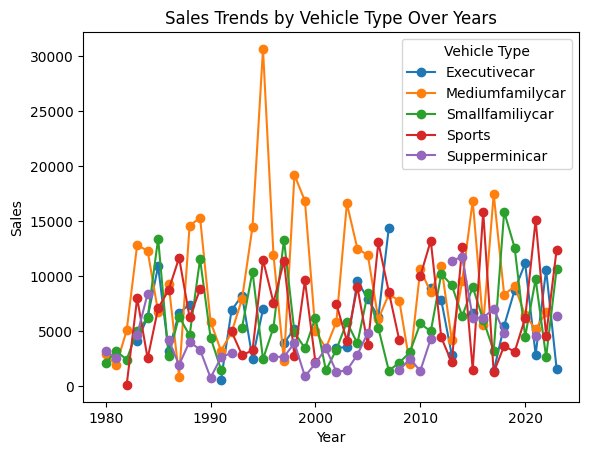

In [23]:
# Task 1.2: Multi-line by Vehicle Type - Sales Trends
sales_type = df.groupby(["year", "vehicle_type"])["automobile_sales"].sum().unstack()
sales_type.plot(marker="o")
plt.title("Sales Trends by Vehicle Type Over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(title="Vehicle Type")
plt.savefig("Line_plot_2.png")
plt.show()
plt.close()

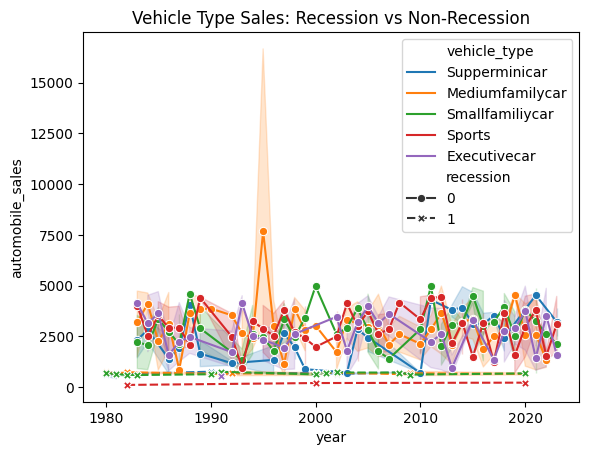

In [24]:
# Task 1.3: Seaborn - Comparing Recession vs Non-Recession Trends
sns.lineplot(
    data=df,
    x="year", y="automobile_sales", hue="vehicle_type",
    style="recession", markers=True
)
plt.title("Vehicle Type Sales: Recession vs Non-Recession")
plt.savefig("Bar_Chart.png")
plt.show()
plt.close()

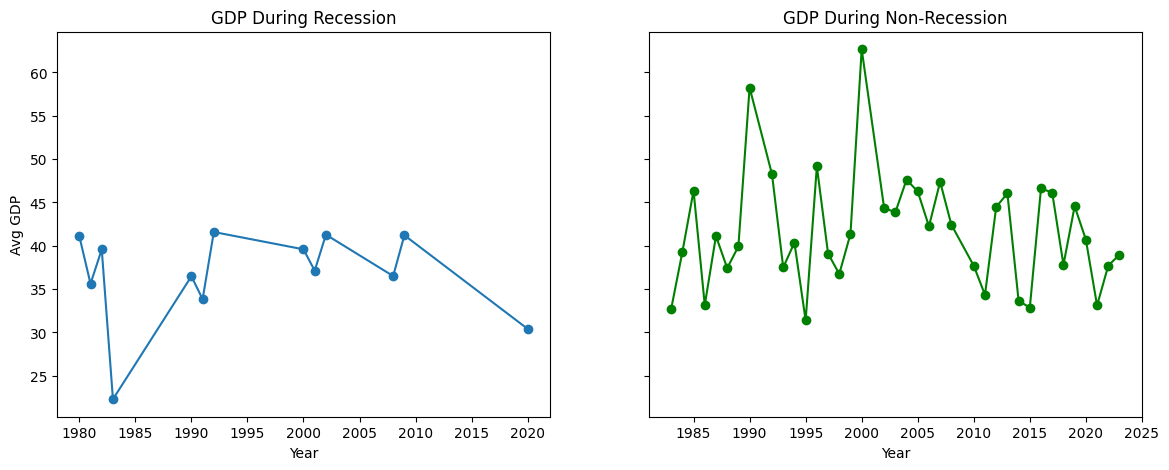

In [25]:
# Task 1.4: Subplots - GDP Variation by Periods
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
recession = df[df["recession"] == 1]
nonrec = df[df["recession"] == 0]

axes[0].plot(recession.groupby("year")["gdp"].mean(), marker="o")
axes[0].set_title("GDP During Recession")
axes[0].set_xlabel("Year"); axes[0].set_ylabel("Avg GDP")

axes[1].plot(nonrec.groupby("year")["gdp"].mean(), marker="o", color="green")
axes[1].set_title("GDP During Non-Recession")
axes[1].set_xlabel("Year")
plt.savefig("Subplot.png")
plt.show()
plt.close()

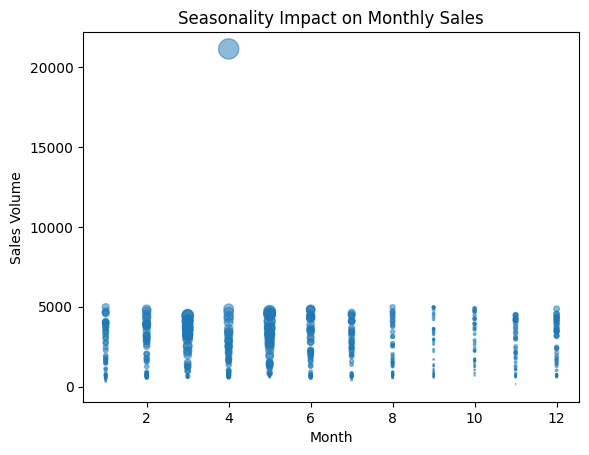

In [26]:
# Task 1.5: Bubble Plot - Seasonality vs Sales
bubble = df.groupby(df["date"].dt.to_period("M")).agg({
    "automobile_sales": "sum", "seasonality_weight": "mean"
}).reset_index()
bubble["month_num"] = bubble["date"].dt.month

plt.scatter(
    x=bubble["month_num"],
    y=bubble["automobile_sales"],
    s=bubble["seasonality_weight"] * bubble["automobile_sales"] / 100,
    alpha=0.5
)
plt.title("Seasonality Impact on Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales Volume")
plt.savefig("Bubble.png")
plt.show()
plt.close()

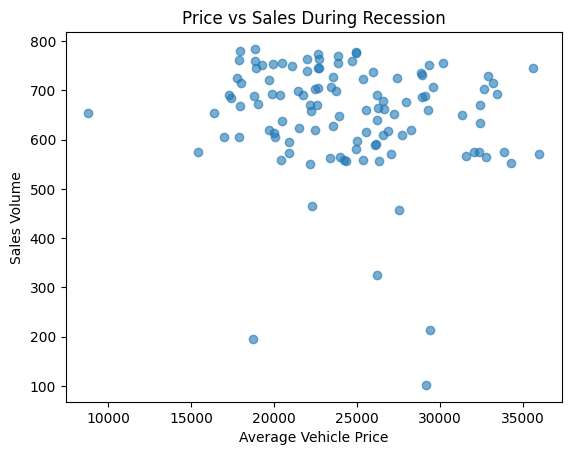

In [27]:
# Task 1.6: Scatter Plot - Avg Price vs Sales During Recession
rec = df[df["recession"] == 1]
plt.scatter(rec["price"], rec["automobile_sales"], alpha=0.6)
plt.title("Price vs Sales During Recession")
plt.xlabel("Average Vehicle Price")
plt.ylabel("Sales Volume")
plt.savefig("Scatter.png")
plt.show()
plt.close()


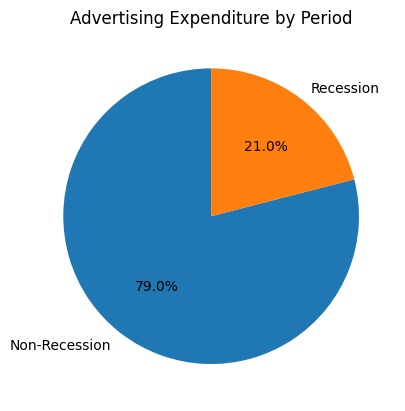

In [28]:
# Task 1.7: Pie Chart - Advertising Expenditure (Recession vs Non-Recession)
ad_by_period = df.groupby("recession")["advertising_expenditure"].sum()
labels = ["Non-Recession", "Recession"]
ad_by_period.plot(kind="pie", labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Advertising Expenditure by Period")
plt.ylabel("")
plt.savefig("Pie_1.png")
plt.show()
plt.close()

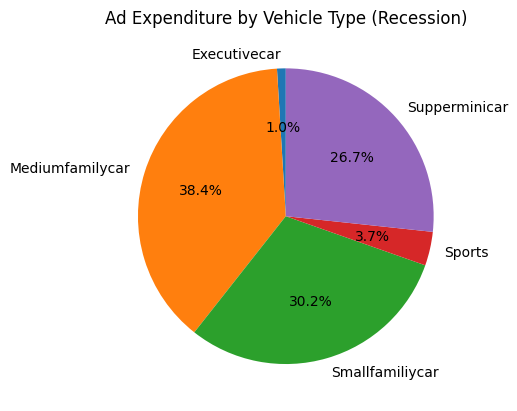

In [29]:
# Task 1.8: Pie Chart - Ad Spend by Vehicle Type (During Recession)
ad_type = df[df["recession"] == 1].groupby("vehicle_type")["advertising_expenditure"].sum()
ad_type.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Ad Expenditure by Vehicle Type (Recession)")
plt.ylabel("")
plt.savefig("Pie_2.png")
plt.show()
plt.close()


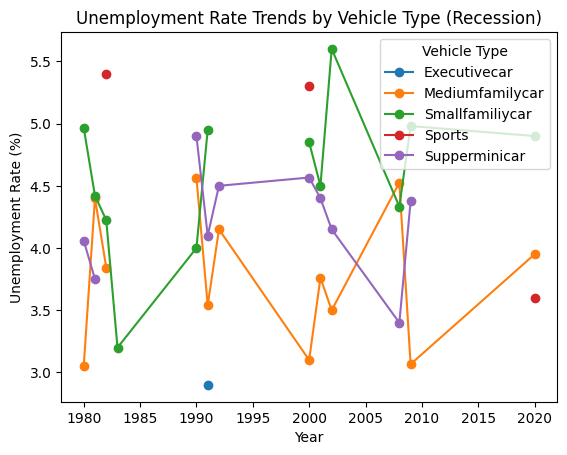

In [30]:
# Task 1.9: Line Plot - Unemployment Rate by Vehicle Type During Recession
unemp = df[df["recession"] == 1].groupby(["year", "vehicle_type"])["unemployment_rate"].mean().unstack()
unemp.plot(marker="o")
plt.title("Unemployment Rate Trends by Vehicle Type (Recession)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Vehicle Type")
plt.savefig("Line_plot_3.png")
plt.show()
plt.close()

In [31]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Assuming df is your properly formatted DataFrame from previous steps

# Task 2.1: Create Dash application with meaningful title
app = dash.Dash(__name__)
app.title = "Automobile Sales Analytics Dashboard"  # This will be your Title.png

In [35]:
# Task 2.2: Add dropdowns with appropriate titles and options
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign': 'center'}),
    
    # First dropdown for report type selection
    dcc.Dropdown(
        id='report-type',
        options=[
            {'label': 'Recession Report', 'value': 'recession'},
            {'label': 'Yearly Report', 'value': 'yearly'}
        ],
        value='recession',
        style={'width': '50%', 'margin': 'auto'},
        placeholder="Select Report Type"
    ),
    
    # Second dropdown for graph type selection
    dcc.Dropdown(
        id='graph-type',
        style={'width': '50%', 'margin': 'auto'},
        placeholder="Select Graph Type"
    ),
    
    # Output container division
    html.Div(id='output-container'),
    
    # Graph display area
    html.Div([
        dcc.Graph(id='graph1'),
        dcc.Graph(id='graph2')
    ])
])

In [37]:
# Task 2.3: Division for output display with appropriate id and classname
output_div = html.Div(
    id='output-container',
    className='output-div',
    style={
        'margin': '20px',
        'padding': '15px',
        'border': '1px solid #ddd',
        'border-radius': '5px',
        'background-color': '#f9f9f9'
    }
)

In [38]:
# Task 2.4: Callback function to update the input and output containers
@app.callback(
    [Output('graph-type', 'options'),
     Output('output-container', 'children')],
    [Input('report-type', 'value')]
)
def update_containers(selected_report):
    # Update graph type options based on report type
    if selected_report == 'recession':
        options = [
            {'label': 'Sales During Recession', 'value': 'recession_sales'},
            {'label': 'Price vs Sales', 'value': 'price_sales'},
            {'label': 'Unemployment Rate', 'value': 'unemployment'}
        ]
        message = "Recession Report Statistics"
    else:
        options = [
            {'label': 'Yearly Sales', 'value': 'yearly_sales'},
            {'label': 'Vehicle Type Trends', 'value': 'vehicle_trends'},
            {'label': 'Seasonality Impact', 'value': 'seasonality'}
        ]
        message = "Yearly Report Statistics"
    
    return options, html.H3(message, style={'textAlign': 'center'})

In [40]:
from dash import Dash, dcc, html, Input, Output, State  # Added State import
import dash.exceptions
import plotly.express as px

# Task 2.5: Callback for Recession Report Graphs
@app.callback(
    [Output('graph1', 'figure'),
     Output('graph2', 'figure')],
    [Input('graph-type', 'value')],
    [State('report-type', 'value')]  # Now properly defined
)
def update_recession_graphs(selected_graph, report_type):
    if report_type != 'recession':
        raise dash.exceptions.PreventUpdate
        
    if selected_graph == 'recession_sales':
        fig1 = px.line(
            df[df['recession'] == 1].groupby('year')['automobile_sales'].sum().reset_index(),
            x='year', y='automobile_sales',
            title='Automobile Sales During Recession Years'
        )
        fig2 = px.bar(
            df[df['recession'] == 1].groupby('vehicle_type')['automobile_sales'].sum().reset_index(),
            x='vehicle_type', y='automobile_sales',
            title='Sales by Vehicle Type During Recession'
        )
    elif selected_graph == 'price_sales':
        fig1 = px.scatter(
            df[df['recession'] == 1],
            x='price', y='automobile_sales',
            title='Price vs Sales During Recession'
        )
        fig2 = px.box(
            df[df['recession'] == 1],
            x='vehicle_type', y='price',
            title='Price Distribution by Vehicle Type During Recession'
        )
    else:  # unemployment
        fig1 = px.line(
            df[df['recession'] == 1].groupby(['year', 'vehicle_type'])['unemployment_rate'].mean().reset_index(),
            x='year', y='unemployment_rate', color='vehicle_type',
            title='Unemployment Rate During Recession by Vehicle Type'
        )
        fig2 = px.histogram(
            df[df['recession'] == 1],
            x='unemployment_rate',
            title='Unemployment Rate Distribution During Recession'
        )
    
    return fig1, fig2

In [41]:
# Task 2.6: Callback for Yearly Report Graphs
@app.callback(
    [Output('graph1', 'figure'),
     Output('graph2', 'figure')],
    [Input('graph-type', 'value')],
    [State('report-type', 'value')]
)
def update_yearly_graphs(selected_graph, report_type):
    if report_type != 'yearly':
        raise dash.exceptions.PreventUpdate
        
    if selected_graph == 'yearly_sales':
        fig1 = px.line(
            df.groupby('year')['automobile_sales'].sum().reset_index(),
            x='year', y='automobile_sales',
            title='Yearly Automobile Sales'
        )
        fig2 = px.area(
            df.groupby(['year', 'recession'])['automobile_sales'].sum().reset_index(),
            x='year', y='automobile_sales', color='recession',
            title='Sales with Recession Periods Highlighted'
        )
    elif selected_graph == 'vehicle_trends':
        fig1 = px.line(
            df.groupby(['year', 'vehicle_type'])['automobile_sales'].sum().reset_index(),
            x='year', y='automobile_sales', color='vehicle_type',
            title='Vehicle Type Sales Trends Over Years'
        )
        fig2 = px.sunburst(
            df.groupby(['year', 'vehicle_type'])['automobile_sales'].sum().reset_index(),
            path=['year', 'vehicle_type'], values='automobile_sales',
            title='Sales Distribution by Year and Vehicle Type'
        )
    else:  # seasonality
        fig1 = px.scatter(
            df.groupby('month')['automobile_sales'].sum().reset_index(),
            x='month', y='automobile_sales',
            title='Monthly Sales Seasonality'
        )
        fig2 = px.bar(
            df.groupby(['month', 'vehicle_type'])['automobile_sales'].sum().reset_index(),
            x='month', y='automobile_sales', color='vehicle_type',
            title='Monthly Sales by Vehicle Type'
        )
    
    return fig1, fig2

@app.callback(
    [Output('graph1', 'figure'),
     Output('graph2', 'figure')],
    [Input('graph-type', 'value')],
    [State('report-type', 'value')]
)
def update_graphs(selected_graph, report_type):
    # Test with simple figure
    test_fig = px.bar(x=['A', 'B'], y=[1, 2], title="Test Graph")
    return test_fig, test_fig

In [42]:
from dash import Dash, dcc, html, Input, Output, State
import dash.exceptions
import plotly.express as px
import pandas as pd

# Initialize the app
app = Dash(__name__)
app.title = "Automobile Sales Dashboard"

# Sample data (replace with your actual df)
data = {
    'date': pd.date_range(start='1/1/2020', periods=24, freq='M'),
    'year': [2020]*12 + [2021]*12,
    'month': list(range(1,13))*2,
    'recession': [1]*6 + [0]*6 + [1]*6 + [0]*6,
    'automobile_sales': [100, 120, 90, 80, 110, 95, 150, 160, 140, 130, 170, 180]*2,
    'vehicle_type': ['Sedan', 'SUV']*12,
    'price': [25000, 35000]*12,
    'unemployment_rate': [5.5, 6.0]*12
}
df = pd.DataFrame(data)

# App layout
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign': 'center'}),
    
    # Dropdowns
    dcc.Dropdown(
        id='report-type',
        options=[
            {'label': 'Recession Report', 'value': 'recession'},
            {'label': 'Yearly Report', 'value': 'yearly'}
        ],
        value='recession',
        style={'width': '50%', 'margin': '20px auto'}
    ),
    
    dcc.Dropdown(
        id='graph-type',
        style={'width': '50%', 'margin': '20px auto'}
    ),
    
    # Output and graphs
    html.Div(id='output-container', style={'textAlign': 'center', 'margin': '20px'}),
    
    html.Div([
        dcc.Graph(id='graph1'),
        dcc.Graph(id='graph2')
    ], style={'display': 'flex', 'flexDirection': 'column', 'gap': '20px'})
])

# Callback to update graph options
@app.callback(
    Output('graph-type', 'options'),
    Input('report-type', 'value')
)
def update_graph_options(selected_report):
    if selected_report == 'recession':
        return [
            {'label': 'Sales During Recession', 'value': 'recession_sales'},
            {'label': 'Price vs Sales', 'value': 'price_sales'},
            {'label': 'Unemployment Rate', 'value': 'unemployment'}
        ]
    else:
        return [
            {'label': 'Yearly Sales', 'value': 'yearly_sales'},
            {'label': 'Vehicle Type Trends', 'value': 'vehicle_trends'},
            {'label': 'Seasonality Impact', 'value': 'seasonality'}
        ]

# Callback to update output container
@app.callback(
    Output('output-container', 'children'),
    [Input('report-type', 'value'),
     Input('graph-type', 'value')]
)
def update_output(report_type, graph_type):
    if not graph_type:
        return html.H3("Select a graph type to display results")
    if report_type == 'recession':
        return html.H3(f"Recession Report: {graph_type.replace('_', ' ').title()}")
    else:
        return html.H3(f"Yearly Report: {graph_type.replace('_', ' ').title()}")

# Combined callback for both report types
@app.callback(
    [Output('graph1', 'figure'),
     Output('graph2', 'figure')],
    [Input('graph-type', 'value')],
    [State('report-type', 'value')]
)
def update_graphs(selected_graph, report_type):
    if not selected_graph:
        raise dash.exceptions.PreventUpdate
        
    if report_type == 'recession':
        # Recession Report Graphs
        if selected_graph == 'recession_sales':
            fig1 = px.line(
                df[df['recession'] == 1].groupby('year')['automobile_sales'].sum().reset_index(),
                x='year', y='automobile_sales',
                title='Automobile Sales During Recession Years'
            )
            fig2 = px.bar(
                df[df['recession'] == 1].groupby('vehicle_type')['automobile_sales'].sum().reset_index(),
                x='vehicle_type', y='automobile_sales',
                title='Sales by Vehicle Type During Recession'
            )
        elif selected_graph == 'price_sales':
            fig1 = px.scatter(
                df[df['recession'] == 1],
                x='price', y='automobile_sales',
                title='Price vs Sales During Recession'
            )
            fig2 = px.box(
                df[df['recession'] == 1],
                x='vehicle_type', y='price',
                title='Price Distribution by Vehicle Type During Recession'
            )
        else:  # unemployment
            fig1 = px.line(
                df[df['recession'] == 1].groupby(['year', 'vehicle_type'])['unemployment_rate'].mean().reset_index(),
                x='year', y='unemployment_rate', color='vehicle_type',
                title='Unemployment Rate During Recession by Vehicle Type'
            )
            fig2 = px.histogram(
                df[df['recession'] == 1],
                x='unemployment_rate',
                title='Unemployment Rate Distribution During Recession'
            )
    else:
        # Yearly Report Graphs
        if selected_graph == 'yearly_sales':
            fig1 = px.line(
                df.groupby('year')['automobile_sales'].sum().reset_index(),
                x='year', y='automobile_sales',
                title='Yearly Automobile Sales'
            )
            fig2 = px.area(
                df.groupby(['year', 'recession'])['automobile_sales'].sum().reset_index(),
                x='year', y='automobile_sales', color='recession',
                title='Sales with Recession Periods Highlighted'
            )
        elif selected_graph == 'vehicle_trends':
            fig1 = px.line(
                df.groupby(['year', 'vehicle_type'])['automobile_sales'].sum().reset_index(),
                x='year', y='automobile_sales', color='vehicle_type',
                title='Vehicle Type Sales Trends Over Years'
            )
            fig2 = px.sunburst(
                df.groupby(['year', 'vehicle_type'])['automobile_sales'].sum().reset_index(),
                path=['year', 'vehicle_type'], values='automobile_sales',
                title='Sales Distribution by Year and Vehicle Type'
            )
        else:  # seasonality
            fig1 = px.scatter(
                df.groupby('month')['automobile_sales'].sum().reset_index(),
                x='month', y='automobile_sales',
                title='Monthly Sales Seasonality'
            )
            fig2 = px.bar(
                df.groupby(['month', 'vehicle_type'])['automobile_sales'].sum().reset_index(),
                x='month', y='automobile_sales', color='vehicle_type',
                title='Monthly Sales by Vehicle Type'
            )
    
    return fig1, fig2

if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\X1 CARBON TOUCH\AppData\Local\Temp\ipykernel_18952\2525628076.py:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

